
**Question 3 ** 

**Submitted by**

Bhupinder Singh (ID: 10634583)

Jaswanth Reddy Mali (ID: 10638130)

Linga Reddy Mamidi (ID: 10635793)

The following code imports packages required to run the project. 

In [1]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from nltk.stem import PorterStemmer
from matplotlib import pyplot as plt
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


In the following code, dataset is called and stored in variable named "dataset"

In [2]:
dataset = pd.read_csv("Tweets.csv")

In [3]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Since airline_sentiment and text were the columns of interest, we chose only those for dataframe

In [4]:
df = dataset[["airline_sentiment","text"]]

In [5]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [6]:
a,b = df.shape
print(a)
print(b)

14640
2


The following code removes URLs, hashtags, mentions and non-alphabetic characters from the text data in a pandas DataFrame. 

In [7]:
re_url = re.compile(r'https?://\S+')
re_hashtags = re.compile(r'#\w+')
re_mentions = re.compile(r'@\w+')
re_nonalp = re.compile('[^a-zA-Z]')
for i in range(a):
  df["text"][i] = re.sub(re_url, "", df["text"][i])
  df["text"][i] = re.sub(re_hashtags, "", df["text"][i])
  df["text"][i] = re.sub(re_mentions, "", df["text"][i])
  df["text"][i] = re.sub(re_nonalp, " ", df["text"][i])


<ipython-input-7-f45c18e90ad9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"][i] = re.sub(re_url, "", df["text"][i])
<ipython-input-7-f45c18e90ad9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"][i] = re.sub(re_hashtags, "", df["text"][i])
<ipython-input-7-f45c18e90ad9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"][i] = re.sub(re_mentions, "", df["text"][i])
<ipython-input-7-f45c18e90ad9>:9: Setti

In [8]:
df.head()

,airline_sentiment,text
0,neutral,What said
1,positive,plus you ve added commercials to the experien...
2,neutral,I didn t today Must mean I need to take an...
3,negative,it s really aggressive to blast obnoxious en...
4,negative,and it s a really big bad thing about it


The following lines of code are downloading the stopwords. It prints the stopwords that have been downloaded

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


{'did', 'to', 'before', 'himself', 'been', 'about', 'weren', 'out', 'further', 'm', 'over', 'so', 'when', 'through', 's', 'hasn', 'be', 'such', 'themselves', "wouldn't", "it's", 've', 'couldn', 'have', 'should', 'yourself', 'of', 'do', 'don', "mustn't", "weren't", 'which', 'if', 'in', 'these', 'mightn', 'above', 'the', 'doesn', 'me', "shan't", 'this', "couldn't", 'why', 'no', 'because', "needn't", 'he', 'itself', 'other', 'what', 'her', 'only', "doesn't", 'won', 'mustn', 'more', 'them', "you'll", 'how', 'having', 'all', 'doing', "aren't", 'until', "hasn't", "hadn't", 'from', 'yours', "you'd", 'being', 'while', 'against', 'yourselves', 'whom', 'on', "don't", 'is', 'here', 'ma', 'a', 'during', 'theirs', 'those', 'd', 'once', 'who', 'between', 'haven', 'his', "you're", 'where', 're', 'shan', 'we', 'were', 'just', 'myself', 'but', 'nor', 'ours', 'i', "haven't", 'very', 'there', 'ain', 'didn', 'again', 'can', 'it', 'him', 'needn', 'than', "mightn't", "didn't", 'my', 'and', 'at', 'you', 'was

The following function is defined to remove the stopwords from the text. The stop words are moved by calling the function.  

In [10]:
def remove_stopwords(text):
  filtered_sent = []
  tokenized_text = word_tokenize(text)
  for w in tokenized_text:
    if w.lower() not in stop_words:
      filtered_sent.append(w.lower())
  return ' '.join(filtered_sent)


In [11]:
df["text"] = df["text"].apply(remove_stopwords)

<ipython-input-11-6fc046f15871>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(remove_stopwords)


The purpose of this lemmatization method is to reduce the english words into base form or dictionary form. 

In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [16]:
def lemmatize(text):
    lemmatized_sent = []
    for w in word_tokenize(text):
        lemmatized_sent.append(lemmatizer.lemmatize(w))
    return " ".join(lemmatized_sent)

In [17]:
df["text"] = df["text"].apply(lemmatize)

<ipython-input-17-77459e9b8a4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(lemmatize)


In [18]:
df.head()

,airline_sentiment,text
0,neutral,said
1,positive,plus added commercial experience tacky
2,neutral,today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


In [19]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from wordcloud import WordCloud, STOPWORDS

The following code makes a wordcloud for negative sentiment. 

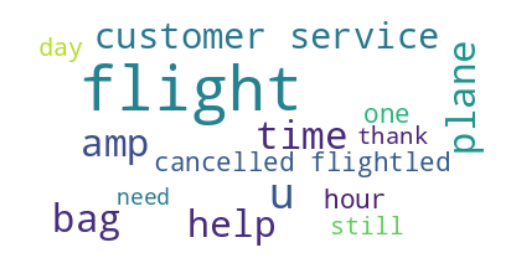

In [21]:
negative = df[df['airline_sentiment'] == 'negative']
words = ' '.join(negative['text'])
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The following code makes the wordcloud for neutral sentiments

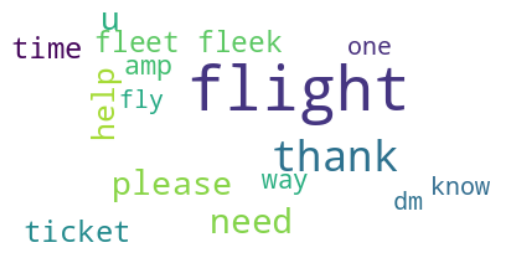

In [22]:
neutral = df[df['airline_sentiment'] == 'neutral']
words = ' '.join(neutral['text'])
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The following code makes wordcloud for positive sentiments

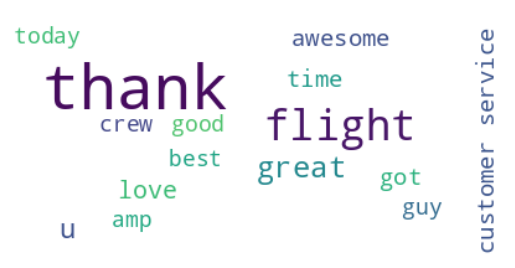

In [23]:
positive = df[df['airline_sentiment'] == 'positive']
words = ' '.join(positive['text'])
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The following code prints top 5 used words in negative sentiment along with how many times they have been used.

<FreqDist with 6950 samples and 86425 outcomes>
[('flight', 3357), ('hour', 1114), ('get', 1017), ('cancelled', 919), ('customer', 780)]


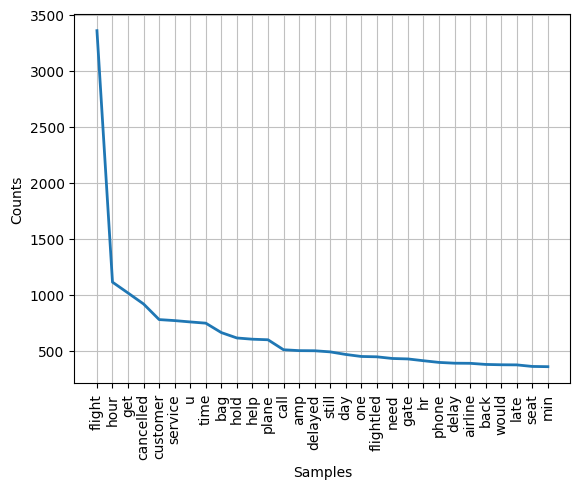

In [24]:
negative = df[df['airline_sentiment'] == 'negative']
words = ' '.join(negative['text'])
tokenized_negative = word_tokenize(words)
fdist_negative = FreqDist(tokenized_negative)
print(fdist_negative)
print(fdist_negative.most_common(5))
fdist_negative.plot(30,cumulative=False)
plt.show()

The following code prints top 5 used words in neutral sentiment along with how many times they have been used.

<FreqDist with 3885 samples and 20870 outcomes>
[('flight', 775), ('get', 241), ('please', 181), ('need', 180), ('help', 167)]


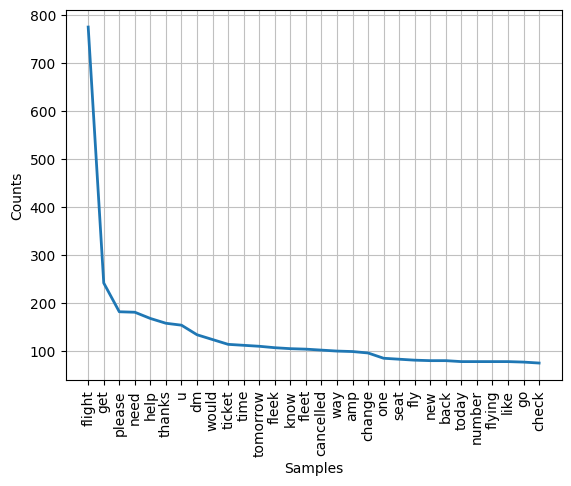

In [25]:
neutral = df[df['airline_sentiment'] == 'neutral']
words = ' '.join(neutral['text'])
tokenized_neutral = word_tokenize(words)
fdist_neutral = FreqDist(tokenized_neutral)
print(fdist_neutral)
print(fdist_neutral.most_common(5))
fdist_neutral.plot(30,cumulative=False)
plt.show()

The following code prints top 5 used words in positive sentiment along with how many times they have been used.

<FreqDist with 3114 samples and 16227 outcomes>
[('thanks', 608), ('thank', 455), ('flight', 440), ('great', 236), ('service', 163)]


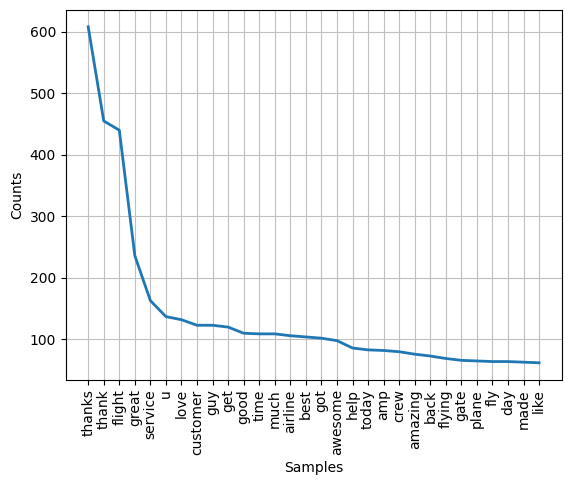

In [26]:
positive = df[df['airline_sentiment'] == 'positive']
words = ' '.join(positive['text'])
tokenized_positive = word_tokenize(words)
fdist_positive = FreqDist(tokenized_positive)
print(fdist_positive)
print(fdist_positive.most_common(5))
fdist_positive.plot(30,cumulative=False)
plt.show()

**Summary of findings:**
In order to analyse human emotions, textual data has to be preprocessed for the text analytics project. Since they don't express emotions, the first step was to remove URLs, hashtags, mentions, and non-alphabetic characters from the comments. Next, stop words were dropped because they don't add anything useful. Then, words were lemmatized to their simplest form. Each sentiment was represented by a word cloud, and the top five words for each sentiment were determined based on their frequency. Words like flight, hour, get, cancelled, and customer were top words linked to a negative sentiment. The words flight, get, please, need, and help were associated with the neutral feeling. Words like thanks, thank , flight, great, and service best described the positive feeling.
